In [4]:
##################### IMPORTS ########################
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint 


In [5]:
################# VARIÁVEIS ###################

# Lista Tempo
deltaT = 1e-2
listaTempo = np.arange(0,2400,deltaT)

# Condutividade Termica Ferro 
kf = 80

# Temperatura Ambiente °K
Ta = 298

# Temperatura Inicial °K
Ti = Ta

# coeficiente de transferência convectiva do ar --> 10W/m2k
hs = 10

#j/kg.K calor especifico do ferro
cf = 450

#emessividade do ferro fundido                                  
e = 0.81

#constante de Boltzman
sigma=5.6703e-8

# Aceleração da gravidade
g = 9.8

# Massa do carro
m = 1500

# Massa do sistema Freio roda
mf = 68 # aproximadamente  8kg roda, 6 kg disco, 3kg pinca                              

# Velocidade do carro +- 50km/h
v = 50
v = v/3.6

# Distância percorrida pelo carro (m)
dist = []
for i in listaTempo:
    dist.append(v*i)

# Angulação da serra
teta = 4.5
teta = math.radians(teta)

# Ponto de falha nos freios --> 350°C
tempFalha = 350
falha = []
for i in listaTempo:
    falha.append(tempFalha)
    
# instante de parada do carro
tParada = 2400

# Temperatura nos freios do carro no inicio da descida considerando que o carro ja estava andando a um tempo 
CI = 323 # (50°C)

# d
d = 0.4


######################### AREAS #########################################


# área de contato com o ar

polegadaRoda = 15
areaContatoRoda = (math.pi * ((polegadaRoda/0.39370)/200)**2)*2*4 
'''
coversão polegada/cm // conversão diâmetro/raio // conversão cm/m // multiplicado por dois por ter dois lados na roda//
multiplicado por 4 por serem 4 rodas
Foi considerado a área da roda como um círculo interno e um externo apenas. Desconsiderou-se os buracos da roda e outros fatores. 
'''

mmDisco = 256
areaContatoDisco = math.pi * ((mmDisco/2000)**2 - (0.2 * mmDisco/2000)**2) * 2 * 4
'''
área de contato do freio com o ar. Foi tomado como diametro interno do disco, 20 % do diametro total
'''

areaTotalConveccao = areaContatoRoda + areaContatoDisco

# área de contato condução
areaTotalConducao = ((0.2 * mmDisco/2000)**2) * 4

# área de Radiação
areaTotalRadiacao = areaTotalConveccao



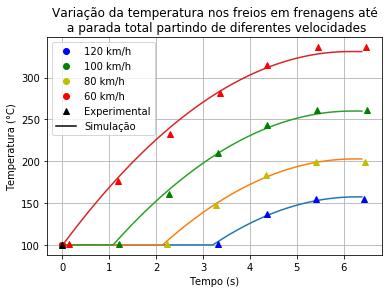

In [7]:
################################################### Validação ##############################################################

######################## Simulação ##############################

# ============================Equação ==========================
mfVali = 90

listaTempoVali = np.arange(0,6.4,deltaT)

CIVali = 373.15

mVali = 17000

def EqDifVali(Tf, t, v):
    # nessa função será calculado quanto calor entra nos freios em uma freanagem até a parada em diferentes velocidades
    da = 5.4
    
    if v < 120/3.6:
        iniFrena = (6.4/120) * (120-v*3.6)
    
    else:
        iniFrena = 0
    if t - iniFrena > 0:
        if v - da * (t - iniFrena) > 0:
            V = v - da * (t - iniFrena)
            deltaE = ((mVali * V**2)/2) - ((mVali * (V - da*deltaT) **2)/2)
            Pot = deltaE/deltaT
        else:
            Pot = 0
        
    if t < iniFrena:
        dTfdt = 0
        
    else:
        Qcond = ((areaTotalConducao * kf) / d) * (Tf - Ta)              
        Qconv = (Tf - Ta)*(hs * areaTotalConveccao)
        Qrad = e * sigma * areaTotalRadiacao * Tf**4
    
        dTfdt = (Pot - Qconv - Qcond - Qrad)/(mfVali * cf)
    
    return dTfdt

TfVali = odeint(EqDifVali,CIVali,listaTempoVali,args = (v,))

# ============================== Plot ========================================
listaVeloVali = [16.6, 22.2, 27.7, 33.3]
for i in listaVeloVali:
    TfVali = odeint(EqDifVali,CIVali,listaTempoVali, args = (i,))
    TfC2 = []
    for w in TfVali:
        TfC2.append(w-273.15)
    plt.plot(listaTempoVali, TfC2)
plt.title('Variação da temperatura nos freios em frenagens até\n a parada total partindo de diferentes velocidades')
plt.grid(True)
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (°C)')

############################### Experimental ######################################

# ========================== 120 ========================================

pontos120 = [
0.13562,100.86207,1.18562,175.86207,2.28968,232.75862,3.36349,281.89655,4.37678,315.51724,5.44513,336.20690,6.48174,341.37931
]

x120 = []
y120 = []
for i in range(len(pontos120)):
    if i%2 == 0:
        y120.append(pontos120[i-1])
    else:
        x120.append(pontos120[i-1])

y120.append(y120[-1])
del y120[0]

plt.plot(x120,y120,'r^')

pontos100 = [
1.20000,100.86207,2.27579,160.34483,3.32083,209.48276,4.36290,243.10345,5.43075,261.20690,6.49613,266.37931
]

# ============================= 100 =========================================

x100 = []
y100 = []
for i in range(len(pontos100)):
    if i%2 == 0:
        y100.append(pontos100[i-1])
    else:
        x100.append(pontos100[i-1])
        
y100.append(y100[-1])
del y100[0]

plt.plot(x100,y100,'g^')

# ============================= 80 =========================================

pontos80 = [
2.23562,100.86207,3.28016,147.41379,4.35149,183.62069,5.41885,199.13793,6.45595,206.89655
]

x80 = []
y80 = []
for i in range(len(pontos80)):
    if i%2 == 0:
        y80.append(pontos80[i-1])
    else:
        x80.append(pontos80[i-1])

y80.append(y80[-1])
del y80[0]        

plt.plot(x80,y80,'y^')

# ============================= 60 =========================================

pontos60 = [
3.32877,100.86207,4.37133,137.06897,5.41042,155.17241,6.44702,160.34483
]

x60 = []
y60 = []
for i in range(len(pontos60)):
    if i%2 == 0:
        y60.append(pontos60[i-1])
    else:
        x60.append(pontos60[i-1])

y60.append(y60[-1])
del y60[0]
    
plt.plot(x60,y60,'b^')    

# ===================== Pontos para as legendas ==================================

bx = [0]
by = [100]
gx = [0]
gy = [100]
yx = [0]
yy = [100]
rx = [0]
ry = [100]

plt.plot(bx,by,'bo', label = '120 km/h')
plt.plot(gx,gy,'go', label = '100 km/h')
plt.plot(yx,yy,'yo', label = '80 km/h')
plt.plot(rx,ry,'ro', label = '60 km/h')

plt.plot(bx,by,'k^', label = 'Experimental')
plt.plot(bx,by,'k-', label = 'Simulação')
plt.legend(loc = 'best')
plt.show()

In [8]:
######################################### Função #####################################

def EqDif(Tf, t, v, teta):
    # Potência fornecida
    Pot = (m * g * v * math.sin(teta))
    
    if t > tParada:                         
        Pot = 0
    
    Qcond = ((areaTotalConducao * kf) / d) * (Tf - Ta)      
    Qconv = (Tf - Ta)*(hs * areaTotalConveccao)
    Qrad = e * sigma * areaTotalRadiacao * Tf**4
    
    dTfdt = (Pot - Qconv - Qcond - Qrad)/(mf * cf)
    
    return dTfdt

Tf = odeint(EqDif,CI,listaTempo, args = (v, teta))

####################### Função utilizada para o gráfico conclusivo #########################

def Conc(TfC2, tempFalha, listaTempoM):
    for i in range(len(TfC2)):
        if TfC2[i] >= tempFalha:
            return listaTempoM[i]
    return 0

In [9]:
################## Conversões #######################

# Kelvin --> Celsius
TfC = []
for i in Tf:
    TfC.append(i-273.15)

# segundo --> minuto
listaTempoM = []
for i in listaTempo:
    listaTempoM.append(i/60)
    
# metros --> quilometro
distKM = []
for i in dist:
    distKM.append(i/1000)

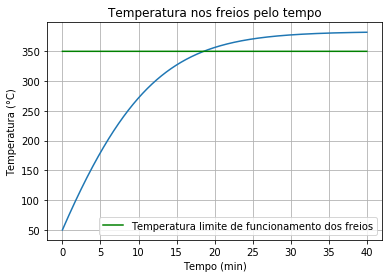

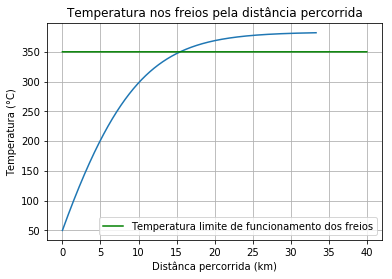

In [10]:

################# Temperatura limite de funcionamento dos freios #########################

plt.plot(listaTempoM, TfC)
plt.plot(listaTempoM, falha,'g-', label = 'Temperatura limite de funcionamento dos freios')
plt.legend(loc = 'lower right')
plt.title('Temperatura nos freios pelo tempo')
plt.grid(True)
plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura (°C)')
plt.show()

################## Temperatura nos freios pela distância percorrida #################

plt.plot(distKM, TfC)
plt.plot(listaTempoM, falha,'g-', label = 'Temperatura limite de funcionamento dos freios')
plt.legend(loc = 'lower right')
plt.title('Temperatura nos freios pela distância percorrida')
plt.grid(True)
plt.xlabel('Distânca percorrida (km)')
plt.ylabel('Temperatura (°C)')
plt.show()


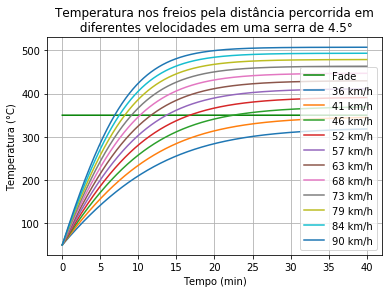

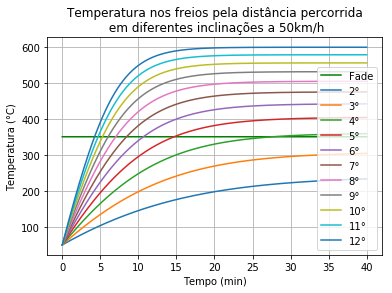

In [11]:
#################### Gráfico Variando #####################
############# Temperatura nos freios pela distância percorrida em diferentes velocidades ###################

TConcVelo = []

plt.plot(listaTempoM, falha,'g-', label = 'Fade')
listaVelo = [10,11.5,13,14.5,16,17.5,19,20.5,22,23.5,25]
for i in listaVelo:
    Tf2 = odeint(EqDif,CI,listaTempo, args = (i,teta))
    TfC2 = []
    for w in Tf2:
        TfC2.append(w-273.15)
    f = Conc(TfC2, tempFalha, listaTempoM)
    if f != 0:
        TConcVelo.append(f)    
    plt.plot(listaTempoM, TfC2, label = '{0} km/h'.format(int(i*3.6)))
plt.legend(loc = 'best')
plt.title('Temperatura nos freios pela distância percorrida em\n diferentes velocidades em uma serra de 4.5°')
plt.grid(True)
plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura (°C)')
plt.show()


############# Temperatura nos freios pela distância percorrida em diferentes inclinações ###################

TConcAngl = []

plt.plot(listaTempoM, falha,'g-', label = 'Fade')
listaAngl = [2,3,4,5,6,7,8,9,10,11,12]
listaAnglRad = []
for i in listaAngl:
    listaAnglRad.append(math.radians(i))
for i in listaAnglRad:
    Tf2 = odeint(EqDif,CI,listaTempo, args = (v,i))
    TfC2 = []
    for w in Tf2:
        TfC2.append(w-273.15)
    f = Conc(TfC2, tempFalha, listaTempoM)
    if f != 0:
        TConcAngl.append(f)
    plt.plot(listaTempoM, TfC2, label = '{0}°'.format(int(math.degrees(i))))
plt.legend(loc = 'lower right')
plt.title('Temperatura nos freios pela distância percorrida\n em diferentes inclinações a 50km/h')
plt.grid(True)
plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura (°C)')
plt.show()




In [ ]:
#################################### Gráficos Conclusivos ##################################

################## Diferentes Velocidades ##################

while len(TConcVelo) < len(listaVelo):
    del listaVelo[0]
    
listaVeloKM = []
for i in listaVelo:
    listaVeloKM.append(i*3.6)

plt.plot(listaVeloKM,TConcVelo, "b-")
plt.title("Tempo para se chegar no fade em diferentes\n velocidades em uma serra de 4,5°")
plt.xlabel("Velocidade (km/h)")
plt.ylabel("Tempo (min)")
plt.grid(True)
plt.show()

####################### Difrentes Angulacoes #####################

while len(TConcAngl) < len(listaAngl):
    del listaAngl[0]
    
plt.plot(listaAngl, TConcAngl, "r-")
plt.title("Tempo para se chegar no fade em\n diferentes inclinações a 50km/h")
plt.xlabel("Inclinação da descida (°)")
plt.ylabel("Tempo (min)")
plt.grid(True)
plt.show()

In [ ]:
#################### Referências ##############################
'''
https://www.maxwell.vrac.puc-rio.br/30614/30614.PDF
http://www.scielo.br/scielo.php?script=sci_arttext&pid=S0100-73862001000100007 
'''